In [42]:
import random
import math
import timeit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from matplotlib import tri, cm

pseudoangles: [1.0, 3.0, 5.0, 7.0, 0.75, 1.25]


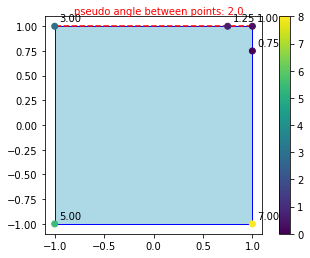

In [43]:
# Question 1: Pseudo-angle over square
def square_pseudo_angle(v):
    if v[1] > 0:
        if v[0] > 0:
            a = v[1]/v[0]
            if a >= 1:
                return v[1]+1-(1/a)
            else:
                return a
        else:
            return 4 - square_pseudo_angle([-v[0], v[1]])
    else:
        return 8 - square_pseudo_angle([v[0], -v[1]])


# Returns the pseudo angle between vectors a and b
def square_pseudo_angle_between(a,b):
    return square_pseudo_angle(b)-square_pseudo_angle(a)    
    
def draw_points_over_square(P, ax):
    pseudoangles = []
    for p in P:
        pangle = square_pseudo_angle(p)
        pseudoangles.append(pangle)
        plt.annotate(f'{pangle:.2f}', [p[0]+0.05, p[1]+0.05])
    print(f'pseudoangles: {pseudoangles}')
    ax.scatter(P[:,0], P[:,1], zorder=10, c=pseudoangles)
    ax.fill([1,-1,-1,1], [1,1,-1,-1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)

fig, ax = plt.subplots()
ax.set_aspect('equal')

pts = np.array([[1,1], [-1,1], [-1,-1], [1,-1], [1, 0.75], [0.75,1]])
draw_points_over_square(pts, ax) 
ax.plot(pts[0:2,0], pts[0:2,1], linestyle='--', c='red')
between = square_pseudo_angle_between(pts[0,:], pts[1,:])
plt.annotate('pseudo angle between points: ' + str(between), [pts[1,0]+0.2, pts[0,1] + 0.12], annotation_clip=False, color='red')

plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=8)))
plt.show()

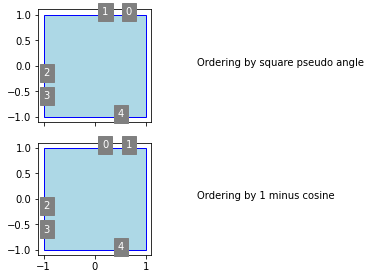

Average time to sort using square pseudo angle: 0.0023196000001917128
Average time to sort using cosine pseudo angle: 0.018493900000066787


In [44]:
# Question 2: More pseudo angles
def pseudo_angle_dot(a,b):
    return 1 - (np.dot(a,b) / (np.linalg.norm(a)*np.linalg.norm(b))) 

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
for a in ax:
    a.set_aspect('equal')
fig.tight_layout()

# Get n points randomly distributed on a unit square    
def get_pts_on_sqr(n):
    pts = []
    for i in range(0,n):
        a = random.uniform(-1,1)
        sign = random.choice([1,-1])
        if random.choice([True, False]):
            pts.append([sign,a])
        else:
            pts.append([a,sign])
    return np.array(pts)


def order_by_pseudo_angle_and_plot(pts, f, ax, title):
    ordered = sorted(pts, key=f)
    for (i, p) in enumerate(ordered):
        ax.text(p[0], p[1], i, backgroundcolor='gray', color='white')
    ax.fill([1,-1,-1,1], [1,1,-1,-1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)
    ax.text(2,0,title)
    
pts = get_pts_on_sqr(5)
order_by_pseudo_angle_and_plot(pts, lambda pt: square_pseudo_angle(pt), ax[0], 'Ordering by square pseudo angle')
order_by_pseudo_angle_and_plot(pts, lambda pt: pseudo_angle_dot(np.array([0,1]), pt), ax[1], 'Ordering by 1 minus cosine')
plt.show()

pts = get_pts_on_sqr(100)

time_square = timeit.timeit(lambda: sorted(pts, key=lambda pt: square_pseudo_angle(pt)), number=10)
time_cos = timeit.timeit(lambda: sorted(pts, key=lambda pt: pseudo_angle_dot(np.array([0,1]), pt)), number=10)

print(f'Average time to sort using square pseudo angle: {time_square}')
print(f'Average time to sort using cosine pseudo angle: {time_cos}')

In [45]:
# Question 3: Vector operations
def vec_sum(a,b):
    return np.array([a+b for [a,b] in zip(a,b)])

def vec_subtract(a,b):
    return np.array([a-b for [a,b] in zip(a,b)])

def vec_dot(a,b):
    return sum([a*b for [a,b] in zip(a,b)])


np.set_printoptions(precision=2)
# Show sum of two random vectors
print('Operations with random vectors')
a = np.array([random.random(), random.random()])
b = np.array([random.random(), random.random()])
c = vec_sum(a,b)
print(f'{a} + {b} = {c}')
d = vec_subtract(a,b)
print(f'{a} - {b} = {d}')
e = vec_dot(a,b)
print(f'{a} . {b} = {e:.2f}')

print('Operation with colinear vectors')
a = np.array([1,1])
b = np.array([2,2])

c = vec_sum(a,b)
print(f'{a} + {b} = {c}')
d = vec_subtract(a,b)
print(f'{a} - {b} = {d}')
e = vec_dot(a,b)
print(f'{a} . {b} = {e:.2f}')

Operations with random vectors
[0.43 0.23] + [0.16 0.39] = [0.59 0.63]
[0.43 0.23] - [0.16 0.39] = [ 0.26 -0.16]
[0.43 0.23] . [0.16 0.39] = 0.16
Operation with colinear vectors
[1 1] + [2 2] = [3 3]
[1 1] - [2 2] = [-1 -1]
[1 1] . [2 2] = 4.00


In [46]:
# Question 4: Cross product

# Receives two two-dimensional vectors, a and b, interpreted as three-dimensional vectors lying on the XY plane.
# Returns the cross product between them
def cross(a,b):
    return a[0]*b[1] - a[1]*b[0]

# Receives two line segments, ab and cd, on the XY plane and returns if they intercept or not
def intersect(a,b,c,d):
    ab = np.subtract(b, a)
    ac = np.subtract(c, a)
    ad = np.subtract(d, a)
    
    cd = np.subtract(d, c)
    ca = np.subtract(a, c)
    cb = np.subtract(b, c)
    
    p1 = cross(ab, ac) * cross(ab, ad)
    p2 = cross(cd, ca) * cross(cd, cb)
    
    return p1 < 0 and p2 < 0

# Receives three points, a, b and c, on the XY plane, and returns the oriented area of their parallelogram
def oriented_area(a,b,c):
    o = np.array([0,0])
    
    oa = np.subtract(a,o)
    ob = np.subtract(b,o)
    oc = np.subtract(c,o)
    
    return 0.5 * (cross(oa, ob) + cross(ob, oc) + cross(oc, oa))

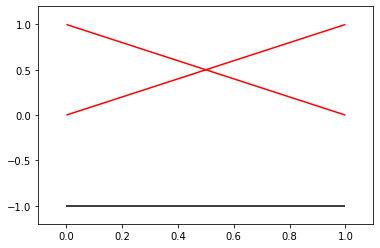

In [47]:
# Visualize Question 4 results:

# Line intersection

# Returns color c1 if ab and cd intersect, and color c2 otherwise
def get_color(a, b, c, d, c1, c2):
    return c1 if intersect(a, b, c, d) else c2

a1 = np.array([0,0])
a2 = np.array([1,1])

b1 = np.array([1,0])
b2 = np.array([0,1])

c1 = np.array([0,-1])
c2 = np.array([1,-1])

a = np.array([a1,a2]).reshape((-1,2))
b = np.array([b1,b2]).reshape((-1,2))
c = np.array([c1,c2]).reshape((-1,2))

# Show line segments that intersect with a as red, black otherwise 
lines = [a, b, c]
int_col = [1,0,0,1]
nint_col = [0,0,0,1]

colors = np.array([int_col, get_color(a1,a2,b1,b2,int_col,nint_col), get_color(a1,a2,c1,c2,int_col,nint_col)])

lc = mc.LineCollection(lines, colors=colors)

fig, ax = plt.subplots()

ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

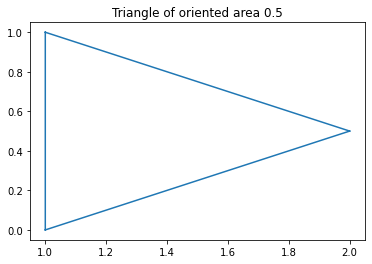

In [48]:
# Oriented area
a = np.array([1,0])
b = np.array([2,0.5])
c = np.array([1,1])

points = np.array([a, b, c]).reshape((3,-1))
indices = [[0, 1, 2]]

tris = tri.Triangulation(points[:,0], points[:,1], triangles=indices)

plt.title(f'Triangle of oriented area {oriented_area(a,b,c)}')
lines = plt.triplot(tris)

In [49]:
# Question 5: Point in polygon - Ray technique

# Intersection algorithm and rotation index algorithm

# Finds the point of intersection between two lines p1p2 and p3p4
def line_intersection(p1, p2, p3, p4):
    [x1,y1] = [p1[0], p1[1]]
    [x2,y2] = [p2[0], p2[1]]
    [x3,y3] = [p3[0], p3[1]]
    [x4,y4] = [p4[0], p4[1]]
    
    D = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    
    x = ( (x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4) ) / D
    y = ( (x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4) ) / D
    
    return np.array([x,y])

# Returns distance between two points
def distance(p1, p2):
    [x1,y1] = [p1[0], p1[1]]
    [x2,y2] = [p2[0], p2[1]]
    
    return math.hypot(x2-x1, y2-y1) 

# Check if point lies on the line
def point_in_line(P, a, b):
    return math.isclose(distance(a, P) + distance(P, b), distance(a, b))

# Receives a point P and a sequence of points p = [p_0, p_1, ... , p_n, p_(n+1)], that forms a closed polygon,
# where p_(n+1) == p_1. Returns -1 if outside, 0 if in frontier, 1 if inside
def point_in_polygon_intersection(P, p):
    n = len(p)-1
    N = 0 # Number of intersections
    [x0, y0] = [P[0], P[1]]
    Pn = np.add(P, [1,0]) # We will test the horizontal line that passes by P
    for i in range(0,n):
        xi = p[i,0]
        yi = p[i,1]
        xip1 = p[i+1,0]
        yip1 = p[i+1,1]
    
        if not math.isclose(yi, yip1): # Is not an horizontal line
            [x, y] = line_intersection(p[i], p[i+1], P, Pn) # Check the intersection between test line and one line of the poly
            if math.isclose(x, x0): # If the inter point is the same as the test point, itself lies on the polygon frontier
                return 0
            elif x > x0 and point_in_line([x,y], p[i],p[i+1]):
                N += 1
        elif point_in_line(P, p[i], p[i+1]):
            return 0
    odd = N % 2 == 1
    return 1 if odd else -1

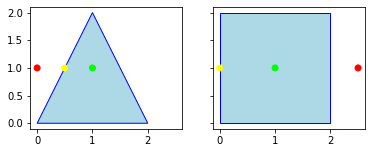

In [50]:
# Visualize Question 5 results:

stat_to_col = {
    1: [0,1,0,1],
    0: [1,1,0,1],
    -1: [1,0,0,1]
}

# P is a sequence of test points
def draw_points_in_polygon(P, p, ax, test_f, col_map):
    colors = []
    for pt in P:
        status = test_f(pt, p)
        colors.append(col_map[status])
    ax.scatter(P[:,0], P[:,1], c=colors, zorder=10)
    ax.fill(p[:,0], p[:,1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)
    
test = lambda pt, pl: point_in_polygon_intersection(pt, pl)    
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].set_aspect('equal')
draw_points_in_polygon(np.array([[1,1], [0,1], [0.5,1]]), np.array([[0,0], [2,0], [1,2], [0,0]]), ax[0], test, stat_to_col)
ax[1].set_aspect('equal')
draw_points_in_polygon(np.array([[1,1], [0,1], [2.5,1]]), np.array([[0,0], [2,0], [2,2], [0,2], [0,0]]), ax[1], test, stat_to_col)

In [51]:
# Receives a point P and a sequence of points p = [p_0, p_1, ... , p_n, p_(n+1)], that forms a closed polygon,
# where p_(n+1) == p_1. Returns -1 if outside, 0 if in frontier, 1 if inside
def point_in_polygon_intersection_visual(P, p, ax):
    n = len(p)-1
    N = 0 # Number of intersections
    [x0, y0] = [P[0], P[1]]
    Pn = np.add(P, [1,0]) # We will test the horizontal line that passes by P
    ax.plot([x0, x0+10], [y0, y0], linestyle='--', color='gray', zorder=10)
    for i in range(0,n):
        xi = p[i,0]
        yi = p[i,1]
        xip1 = p[i+1,0]
        yip1 = p[i+1,1]
        line_col = 'gray'
        if not math.isclose(yi, yip1): # Is not an horizontal line
            line_col = 'black'
            [x, y] = line_intersection(p[i], p[i+1], P, Pn) # Check the intersection between test line and one line of the poly
            dot_col = 'red'
            if math.isclose(x, x0): # If the inter point is the same as the test point, itself lies on the polygon frontier
                return 0
            elif x > x0 and point_in_line([x,y], p[i],p[i+1]):
                dot_col = 'green'
                N += 1
            ax.text(x, y, i, backgroundcolor=dot_col, color='white', zorder=10)
        elif point_in_line(P, p[i], p[i+1]):
            return 0
        ax.plot([xi, xip1], [yi, yip1], color=line_col)
        ax.text((xi+xip1)/2, (yi+yip1)/2, i)
    odd = N % 2 == 1
    return 1 if odd else -1

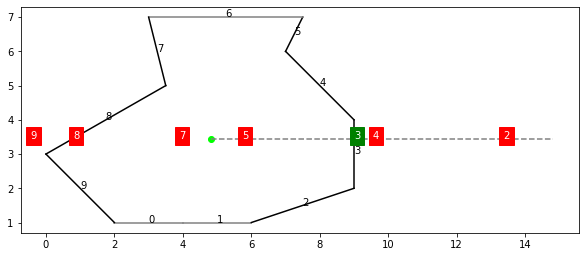

In [52]:
# Question 6: Polygon formed by points

pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[7.5,7],[3,7],[3.5,5],[0,3],[2,1]])
pt = np.array(np.average(pl, axis=0))

fig, ax = plt.subplots(1,1, sharex=True, sharey=True,  figsize=(10,5))
ax.set_aspect('equal')
status = point_in_polygon_intersection_visual(pt,pl,ax)
ax.scatter(pt[0], pt[1], color=stat_to_col[status])

In [53]:
rd = 180/math.pi

# Question 5 - Oriented angle technique
def angle(a,b):
    return math.acos(np.dot(a,b) / (np.linalg.norm(a)*np.linalg.norm(b)) )

# Given an vector x, returns the oriented angle represented by it
def oriented_angle(x):
    sign = 1 if x[1] >= 0 else -1
    return sign*angle(np.array([1,0]), x)

def oriented_angle(a,b):
    return math.atan2(a[0]*b[1] - a[1]*b[0], a[0]*b[0] + a[1]*b[1])

def point_in_polygon_rotation(P, p):
    # Compute rotation index
    k = 0
    n = len(p)-1
    for i in range(0,n):
        Ppi = np.subtract(p[i], P)
        Ppip1 = np.subtract(p[i+1], P)
        or_angl = oriented_angle(Ppi, Ppip1)
        k += or_angl
    k *= 1/(2*math.pi)
    
    # Point is inside polygon if the rotation index is not zero
    return not math.isclose(k, 0, abs_tol=1e-5)



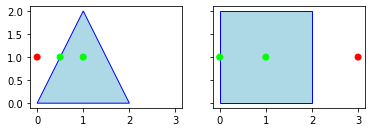

In [54]:
col_map = {
    True: [0,1,0,1],
    False: [1,0,0,1]
}

test = lambda pt, pl: point_in_polygon_rotation(pt, pl)    
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].set_aspect('equal')
draw_points_in_polygon(np.array([[1,1], [0,1], [0.5,1]]), np.array([[0,0], [2,0], [1,2], [0,0]]), ax[0], test, col_map)
ax[1].set_aspect('equal')
draw_points_in_polygon(np.array([[0,1],[1,1],[3,1]]), np.array([[0,0], [2,0], [2,2], [0,2], [0,0]]), ax[1], test, col_map)

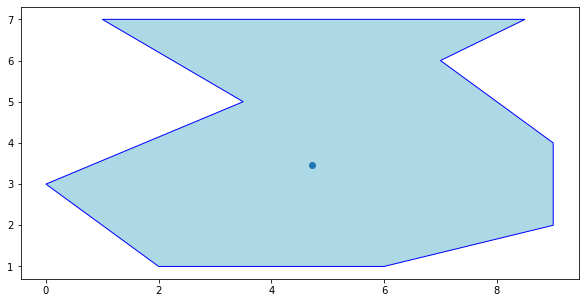

In [55]:
# Question 6: Polygon formed by points
pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3],[2,1]])
pt = np.array(np.average(pl, axis=0))

fig, ax = plt.subplots(figsize=(10,5))

def point_in_polygon_rotation_visual(P, p, ax):
    # Compute rotation index
    k = 0
    n = len(p)-1
    for i in range(0,n):
        Ppi = np.subtract(p[i], P)
        Ppip1 = np.subtract(p[i+1], P)
        ax.plot([P[0], p[i][0]], [P[1], p[i][1]], linestyle='--', zorder=10)
        ax.plot([P[0], p[i][0]], [P[1], p[i][1]], linestyle='--', zorder=10)
        or_angl = oriented_angle(Ppi, Ppip1)
        ax.text((p[i][0] + p[i+1][0])/2, (p[i][1] + p[i+1][1])/2, f'{or_angl*rd:.2f}°', zorder=10, backgroundcolor='gray', color='white')
        k += or_angl
    k *= 1/(2*math.pi)
    ax.set_title(f'Total sum of angles: {k*rd}°')
    # Point is inside polygon if the rotation index is not zero
    return not math.isclose(k, 0, abs_tol=1e-5)

#status = point_in_polygon_rotation_visual(pt, pl, ax)

#ax.scatter(pt[0], pt[1], color=col_map[status], zorder=11)
ax.scatter(pt[0], pt[1], zorder=11)
ax.fill(pl[:,0], pl[:,1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)

plt.show()

In [56]:
def oriented_angle_from_zero(a,b):
    v = math.atan2(a[0]*b[1] - a[1]*b[0], a[0]*b[0] + a[1]*b[1])
    if math.isclose(v, 0):
        v = 0
    elif v < 0:
        v += math.pi * 2
    return v

def direction(p1, p2, p3):
    z = (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0])
    return z

time graham 10 pts:  0.001498399999945832
time graham 100 pts:  0.08319610000035027
time graham 1000 pts:  0.1421133000003465


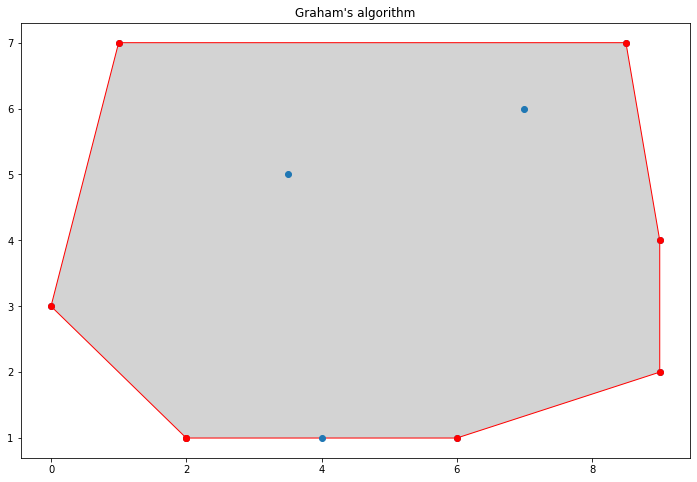

In [57]:
# Graham algorithm
def graham(P):
    # Sort by y-coord then x-coord
    P = P[P[:,0].argsort()]
    P = P[P[:,1].argsort(kind='mergesort')]
    # Get the first point
    p0 = P[0,:]
    
    # Order points by polar angle with p0, if multiple points have same polar angle then keep only the farthest
    angles = {}
    for p in P:
        angle = round(oriented_angle_from_zero((1,0), p-p0), 2)
        if angle not in angles:
            angles[angle] = p
        elif np.linalg.norm(angles[angle]-p0) < np.linalg.norm(p-p0):
            angles[angle] = p
    
    sorted_keys = sorted(list(angles))
    sorted_values = [angles[k] for k in sorted_keys]
    
    stack = []
    for p in sorted_values:
        while len(stack) > 1 and direction(stack[-2], stack[-1], p) <= 0:
            stack.pop()
        stack.append(p)
    
    
    stack.insert(0,p0)
    stack.append(p0)
    return stack

pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3]])
#graham(pl)

def draw_hull(pl, ax):    
    hull = np.array(graham(pl))    
    ax.scatter(pl[:,0], pl[:,1], zorder=11)
    ax.scatter(hull[:,0], hull[:,1], color='red', zorder=12)
    ax.fill(hull[:,0], hull[:,1], facecolor = 'lightgray', edgecolor = 'red', linewidth = 1)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Graham's algorithm")
draw_hull(pl, ax)

def gen_example_and_run_alg(n):
    rng = np.random.default_rng()
    pl = rng.uniform(0.0, n, (n,2))
    hull = graham(pl)

time_graham_10 = timeit.timeit(lambda: gen_example_and_run_alg(10), number=10)
time_graham_100 = timeit.timeit(lambda: gen_example_and_run_alg(100), number=10)
time_graham_1000 = timeit.timeit(lambda: gen_example_and_run_alg(1000), number=10)

print('time graham 10 pts: ', str(time_graham_10))
print('time graham 100 pts: ', str(time_graham_100))
print('time graham 1000 pts: ', str(time_graham_1000))

time jarvis 10 pts:  0.031180299999505223
time jarvis 100 pts:  0.8129281000001356
time jarvis 1000 pts:  8.118218200000229


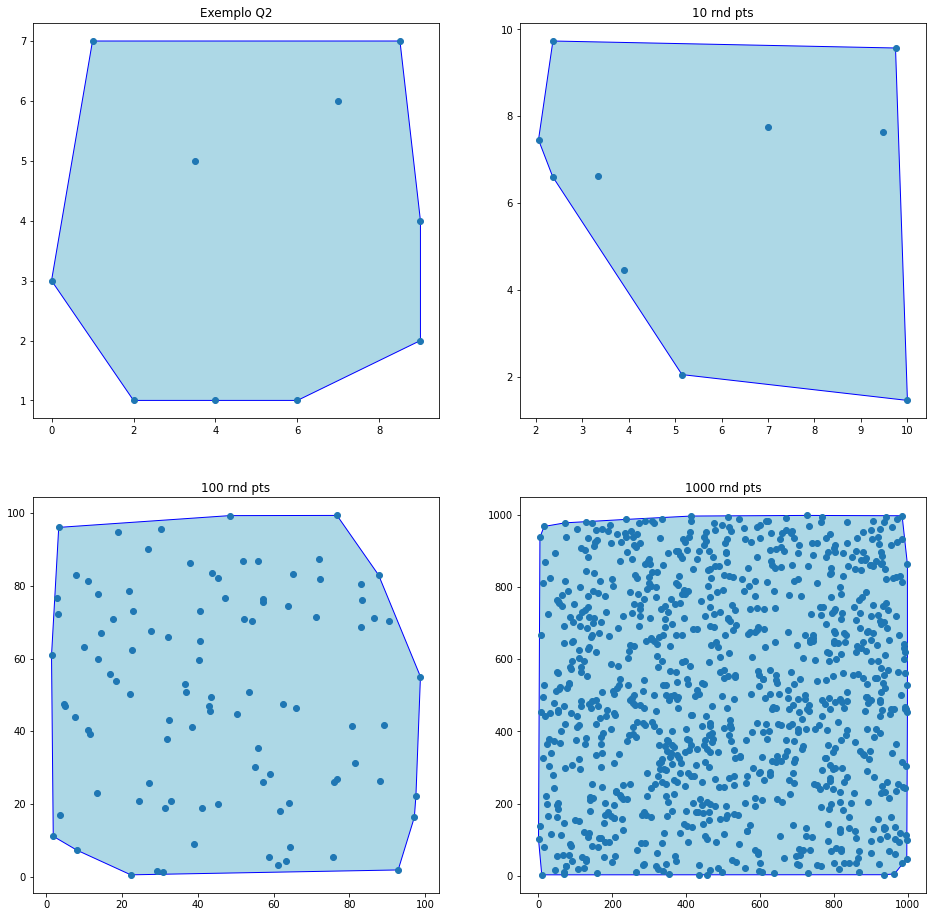

In [58]:
# Jarvis algorithm
def prox(p0, v, P):
    min_angl = 1000000
    min_p = None
    min_i = -1
    for i in range(len(P)):
        p = P[i,:]
        if not np.allclose(p, p0):
            p0p = p - p0
            angle = oriented_angle_from_zero(v, p0p)
            if angle < min_angl:
                min_angl = angle
                min_p = p
                min_i = i
    return min_p, min_i
            

def jarvis(P):
    # Sort by y-coord then x-coord
    P = P[P[:,0].argsort()]
    P = P[P[:,1].argsort(kind='mergesort')]
    # Get the first point
    p0 = P[0,:]
    p1,i1 = prox(p0, (1,0), P)
    hull = [p0, p1]
    
    i = 1
    while not np.allclose(hull[i], p0):
        p_n, i_n = prox(hull[i], hull[i] - hull[i-1], P)
        hull.append(p_n)
        i += 1
        
    return hull


def draw_hull(pl, ax):    
    hull = np.array(jarvis(pl))    
    ax.scatter(pl[:,0], pl[:,1], zorder=11)
    ax.fill(hull[:,0], hull[:,1], facecolor = 'lightblue', edgecolor = 'blue', linewidth = 1)
    
    
pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3]])

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))
draw_hull(pl, ax)

ax.set_title('Exemplo Q2')

rng = np.random.default_rng()
pl2 = rng.uniform(0.0, 10.0, (10,2))

draw_hull(pl2, ax2)
ax2.set_title('10 rnd pts')

pl3 = rng.uniform(0.0, 100.0, (100,2))

draw_hull(pl3, ax3)
ax3.set_title('100 rnd pts')

pl4 = rng.uniform(0.0, 1000.0, (1000,2))

draw_hull(pl4, ax4)
ax4.set_title('1000 rnd pts')

def gen_example_and_run_alg(alg, n):
    rng = np.random.default_rng()
    pl = rng.uniform(0.0, n, (n,2))
    hull = alg(pl)

jarvis_l = lambda p: jarvis(p)
time_10 = timeit.timeit(lambda: gen_example_and_run_alg(jarvis_l, 10), number=10)
time_100 = timeit.timeit(lambda: gen_example_and_run_alg(jarvis_l, 100), number=10)
time_1000 = timeit.timeit(lambda: gen_example_and_run_alg(jarvis_l, 1000), number=10)

print('time jarvis 10 pts: ', str(time_10))
print('time jarvis 100 pts: ', str(time_100))
print('time jarvis 1000 pts: ', str(time_1000))

In [59]:
a = np.array([[2,3],[4,5],[3,5]])
len(a)

3

In [69]:
# Mergehull

BASE_CASE_SIZE = 5

def get_next(i, L):
    #print(f'get next of {i}')
    if i == len(L)-1:
        #print(f'is 0')
        return 0
    #print(f'is {i+1}')
    return i+1

def get_prev(i, L):
    if i == 0:
        return len(L)-1
    return i-1

# Receives two hulls in CCW order
def merge(left, right):
    # Remove the last point that closed the polygon
    left.pop()
    right.pop()
    print(f'merge left {left} and right {right}')
    # For now just merge as received
    hull = []
    left_i = 0 #index of leftmost point on left hull
    for i in range(1, len(left)):
        if left[i][0] > left[left_i][0]:
            left_i = i
    right_i = 0 #index of rightmost point on right hull
    for i in range(1, len(right)):
        if right[i][0] < right[right_i][0]:
            right_i = i
    
    print(f"index of leftmost point {left_i} which is {left[left_i]}")
    print(f"index of rightmost point {right_i} which is {right[right_i]}")
    
    # find the upper tangent line
    # while the line formed by ut_l, ut_r is not the upper tangent to
    p = left_i
    q = right_i
    
    prev_p = None
    prev_q = None
    
    while True:
        prev_p = p
        prev_q = q
        while True:  
            while True:
                print(f'p: {p} q: {q}')
                #print(f'p {p}, next p {get_next(p, left)}')
                #print(f'get direction between {q}: {right[q]}, {p}: {left[p]}, {get_next(p, left)}: {left[get_next(p, left)]}')
                di = direction(right[q], left[p], left[get_next(p, left)])
                print(f'direction {di}')
                if di > 0: # continue while direction is not counter-clockwise
                    break
                p = get_next(p, left)
            
            print(f'p: {p} q: {q}')
            di = direction(left[p], right[q], right[get_prev(q, right)])
            print(f'direction {di}')
            if di < 0: # continue while direction is not clockwise
                break
            q = get_prev(q, right)
        
        
        if p == prev_p and q == prev_q:
            break
    
    print(f'upper tangent is {left[p]} {right[q]}')
        
        
    
    return hull

def mergehull(P):
    # sort by x-coord
    P = P[P[:,0].argsort()]
    mergehull_rec(P)

def mergehull_rec(P):
    print('---- mergehull step -----')
    n = len(P)
    print('n: ', str(n))
    print('list: ', P)
    # Base case
    if n <= BASE_CASE_SIZE:
        hull = jarvis(P)
        return hull
    mid = math.floor(n/2)
    print('mid: ', str(mid))
    left_hull = mergehull_rec(P[:mid,:])
    print('left_hull: ', left_hull)
    right_hull = mergehull_rec(P[mid:,:])
    print('right_hull: ', right_hull)
    hull = merge(left_hull, right_hull)
    return hull
        
pl = np.array([[2,1],[4,1],[6,1],[9,2],[9,4],[7,6],[8.5,7],[1,7],[3.5,5],[0,3]])
hull = mergehull(pl)

print('hull: ', hull)

---- mergehull step -----
n:  10
list:  [[0.  3. ]
 [1.  7. ]
 [2.  1. ]
 [3.5 5. ]
 [4.  1. ]
 [6.  1. ]
 [7.  6. ]
 [8.5 7. ]
 [9.  2. ]
 [9.  4. ]]
mid:  5
---- mergehull step -----
n:  5
list:  [[0.  3. ]
 [1.  7. ]
 [2.  1. ]
 [3.5 5. ]
 [4.  1. ]]
left_hull:  [array([2., 1.]), array([4., 1.]), array([3.5, 5. ]), array([1., 7.]), array([0., 3.]), array([2., 1.])]
---- mergehull step -----
n:  5
list:  [[6.  1. ]
 [7.  6. ]
 [8.5 7. ]
 [9.  2. ]
 [9.  4. ]]
right_hull:  [array([6., 1.]), array([9., 2.]), array([9., 4.]), array([8.5, 7. ]), array([7., 6.]), array([6., 1.])]
merge left [array([2., 1.]), array([4., 1.]), array([3.5, 5. ]), array([1., 7.]), array([0., 3.])] and right [array([6., 1.]), array([9., 2.]), array([9., 4.]), array([8.5, 7. ]), array([7., 6.])]
index of leftmost point 1 which is [4. 1.]
index of rightmost point 0 which is [6. 1.]
p: 1 q: 0
get next of 1
is 2
p 1, next p 2
get next of 1
is 2
get next of 1
is 2
get direction between 0: [6. 1.], 1: [4. 1.], 2: [3